# import part

In [16]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pylab as p
import scipy.signal as sci
import scipy.stats as stats
import os     
from math import pi
import requests
import openpyxl
import pylab as plab
import shelve
import math
from sklearn.decomposition import NMF
from scipy.optimize import minimize
import scipy.interpolate as si
from sklearn.preprocessing import normalize


# setting of the programming

In [17]:
# %matplotlib qt
colour = ['blue', 'orange', 'darkgreen', 'purple', 'lightgreen', 'lime']

order=[
    'Nacl',
    'Ph',
    'Glasses',
    'Laser',
    'PI_film',
    'Dark'
    ]


# read files

In [18]:
dataNacl = np.array(pd.read_excel('Nacl.xlsx'))
dataph = np.array(pd.read_excel('ph.xlsx'))
datadark = np.array(pd.read_excel('dark.xlsx'))
dataglasses = np.array(pd.read_excel('glasses.xlsx'))
datalaser = np.array(pd.read_excel('laser.xlsx'))
dataPI_film = np.array(pd.read_excel('PI_film.xlsx'))


# generate zeros matrix of saving data

In [19]:
data = np.zeros((1024,2901))
mean_glasses = np.zeros((1024,2901))
mean_laser = np.zeros((1024,2901))
mean_Nacl = np.zeros((1024,2901))
datafix = np.zeros((1024,2900))
datafix1 = np.zeros((1024,2900))
dataNaclfix = np.zeros((1024,2900))
normalize_matrix = np.zeros((2900,1024))
coe = np.zeros(1024)

f_sup_px = dataNacl[0:1024,0]
f_sup=-13719+f_sup_px*21.42 -0.0048456*f_sup_px**2

# remove laser from glasses

73
1.0875115672752866


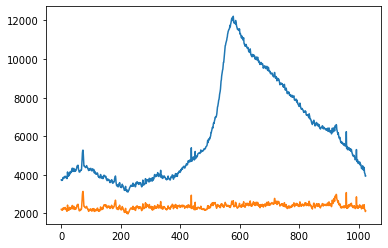

In [20]:
mean_glasses =np.sum(dataglasses[:2902],axis = 1)/2899
mean_laser =np.sum(datalaser[:2902],axis = 1)/2897
mean_Nacl =np.sum(dataNacl[:2902],axis = 1)/2897
plt.figure("mean of glasses and laser")
plt.plot(mean_glasses)
plt.plot(mean_laser)
#plt.plot(mean_Nacl)
#np.inner(dataNacl.T,mean_glasses)
#np.inner(mean_glasses,mean_laser)
max_place = np.argmax(mean_laser[0:100])
print(max_place)
min_place1 = 67
min_place2 = 76

coe = (mean_glasses[max_place]-(mean_glasses[min_place1]+mean_glasses[min_place2])/2)/(mean_laser[max_place]-(mean_laser[min_place1]+mean_laser[min_place2])/2)
print(coe)

## fix the glasses with remove the peak by laser

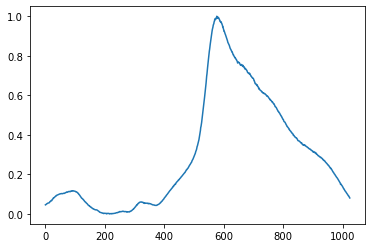

In [21]:
fix_glasses = mean_glasses-coe*mean_laser
#normalize the spectrum
normalize_fix_glasses = (fix_glasses-min(fix_glasses))/(max(fix_glasses)-min(fix_glasses))
normalize_mean_Nacl = (mean_Nacl-min(mean_Nacl))/(max(mean_Nacl)-min(mean_Nacl))
normalize_glasses = (mean_glasses-min(mean_glasses))/(max(mean_glasses)-min(mean_glasses))
plt.plot(normalize_fix_glasses)
#plt.plot(norm_mean_Nacl)
#plt.plot(norm_glasses)

## fix Nacl data manually

 ...]

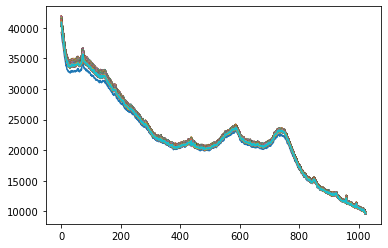

In [22]:
for i in range(1024):
    dataNaclfix[i,:] = dataNacl[i,1:2901]
    dataNaclfix[i,517] =(dataNacl[i,517]+dataNacl[i,519])/2 
    dataNaclfix[i,713] =(dataNacl[i,713]+dataNacl[i,715])/2 
    dataNaclfix[i,1058] =(dataNacl[i,1058]+dataNacl[i,1060])/2 
    dataNaclfix[i,2604] = (dataNacl[i,2604]+dataNacl[i,2606])/2 
plt.plot(dataNaclfix)

 ...]

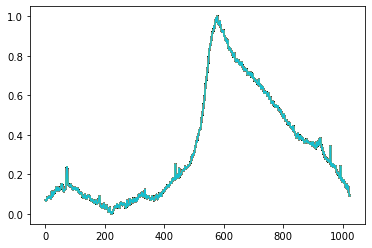

In [23]:
result_innerprod = np.dot(dataNaclfix.T,normalize_glasses)
result_innerprod = result_innerprod.reshape(2900,1)
normalize_glasses = normalize_glasses.reshape(1024,1)
normalize_fix_glasses = normalize_fix_glasses.reshape(1024,1)
matrix = np.dot(result_innerprod,normalize_glasses.T)
#plt.plot(result_innerprod)
#for i in range(2900):
    #plt.plot(matrix[i,:])

for i in range(2900):
    normalize_matrix[i,:] = (matrix[i,:] - min(matrix[i,:]))/(max(matrix[i,:]) - min(matrix[i,:]))
    #plt.plot(normalize_matrix[i,:])
normalize_matrix = normalize_matrix.T
plt.plot(normalize_matrix)
#plt.plot(normalize_fix_glasses)

In [24]:
peak_place = np.argmax(mean_glasses[50:100])
print(peak_place)
min_place = np.argmin(mean_glasses[50:100])
print(min_place)

coe = (mean_Nacl[peak_place+50]-mean_Nacl[min_place+50])/(mean_glasses[peak_place+50]-mean_glasses[min_place+50])
print(coe)

23
12
1.4930472610094976


# repair data manually

# needs to make fix background be straight line

 ...]

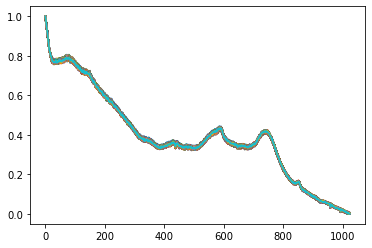

In [25]:
for i in range (2900):
    datafix[:,i] = dataNaclfix[:,i] -coe*mean_laser
#plt.plot(datafix)

for i in range(2900):
    dataNaclfix[:,i] = (dataNaclfix[:,i]-min(dataNaclfix[:,i]))/(max(dataNaclfix[:,i])-min(dataNaclfix[:,i]))

for i in range(2900):
    datafix[:,i] = (datafix[:,i]-min(datafix[:,i]))/(max(datafix[:,i])-min(datafix[:,i]))
plt.plot(datafix)

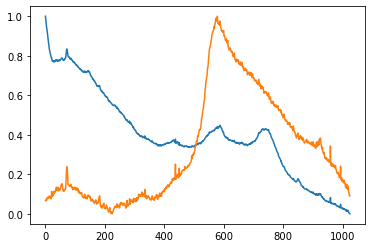

In [26]:
plt.plot(np.mean(dataNaclfix,axis = 1))
plt.plot(np.mean(normalize_matrix,axis = 1))


## Remove the projection of glasses in data

 ...]

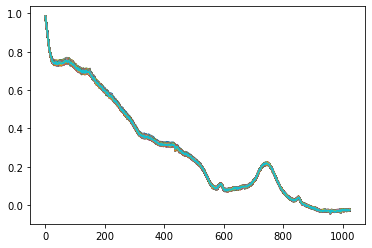

In [27]:
temp = datafix - (np.dot(datafix.T,normalize_fix_glasses)/np.linalg.norm(normalize_fix_glasses,1)*normalize_fix_glasses.T).T
plt.plot(temp)
#plt.plot(normalize_fix_glasses)

## normalize fix data

 ...]

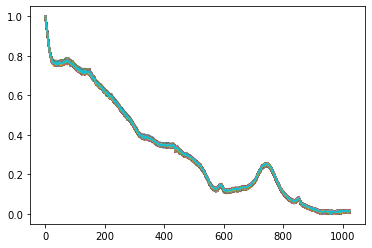

In [28]:
for i in range(2900):
    temp[:,i] = (temp[:,i]-min(temp[:,i]))/(max(temp[:,i])-min(temp[:,i]))
plt.plot(temp)

## nmf component

C:\Users\weinien\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\weinien\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


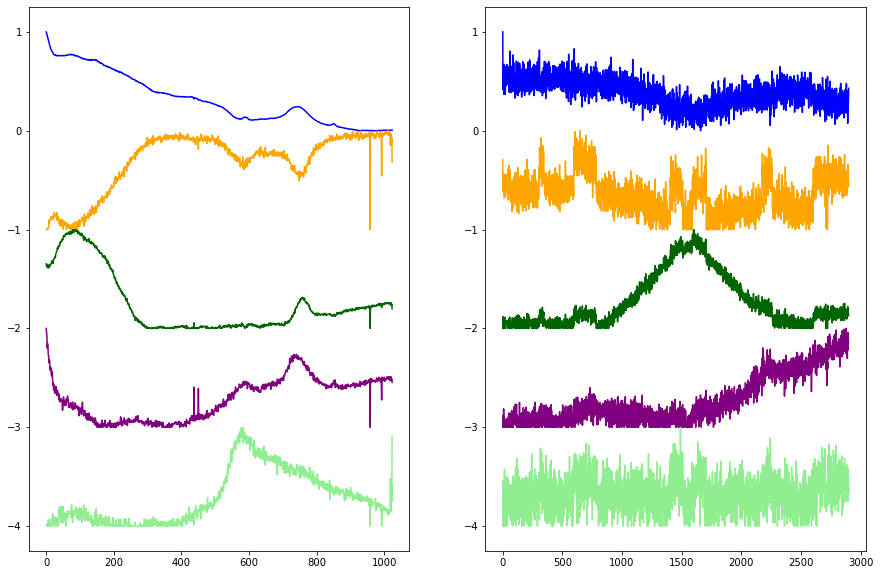

In [29]:
n_components= 5
model = NMF(n_components)
W = model.fit_transform(temp)
H = model.components_
t_dataN = W
f_dataN = H
plt.figure("nmf up:time low:frequency ", figsize=(15, 10))
plt.subplot(121)#, figsize = (15, 10))
for i in range(n_components):
    plt.plot((t_dataN[:,i]-min(t_dataN[:,i]))/np.mean(max(t_dataN[:,i])-min(t_dataN[:,i]))-i,colour[i])
# plt.show()
plt.subplot(122)#, figsize=(15, 10))
for i in range(n_components):
    plt.plot(((f_dataN[i]-min(f_dataN[i]))/(max(f_dataN[i])-min(f_dataN[i]))-i),colour[i])  
plt.show()

## PCA decomposition

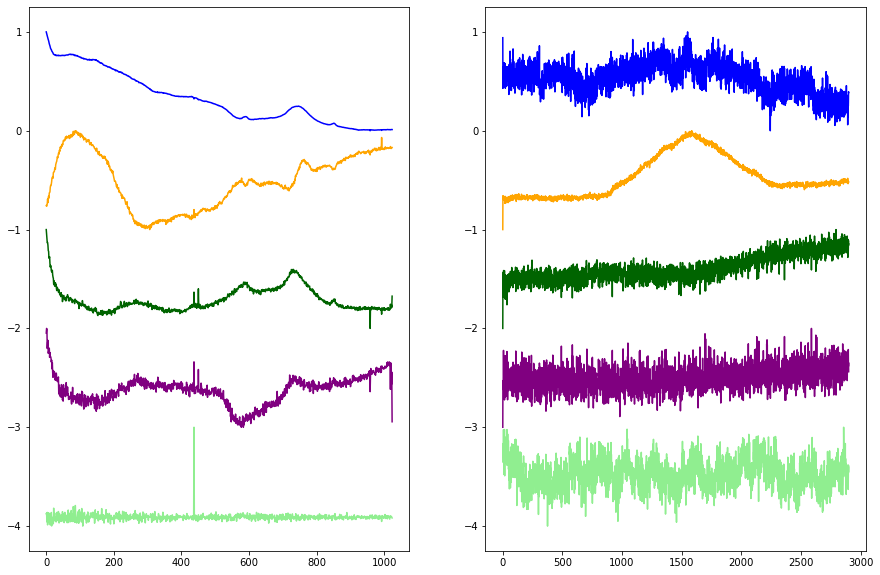

In [30]:
n_components= 5
model = PCA(n_components)
W_PCA = model.fit_transform(temp)
H_PCA = model.components_
t_dataN_PCA = W_PCA
f_dataN_PCA = H_PCA
plt.figure("nmf up:time low:frequency ", figsize=(15, 10))
plt.subplot(121)#, figsize = (15, 10))
for i in range(n_components):
    plt.plot((t_dataN_PCA[:,i]-min(t_dataN_PCA[:,i]))/np.mean(max(t_dataN_PCA[:,i])-min(t_dataN_PCA[:,i]))-i,colour[i])
# plt.show()
plt.subplot(122)#, figsize=(15, 10))
for i in range(n_components):
    plt.plot(((f_dataN_PCA[i]-min(f_dataN_PCA[i]))/(max(f_dataN_PCA[i])-min(f_dataN_PCA[i]))-i),colour[i])  
plt.show()

## test

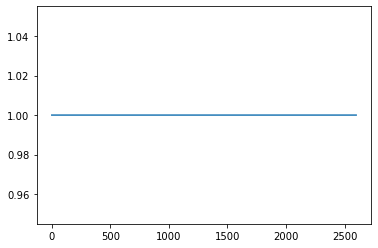

In [31]:
concentration = np.ones(2600)
plt.plot(concentration)

200.0
749


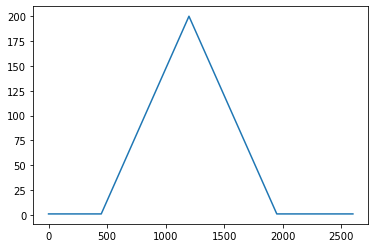

In [32]:
for i in range(1,750):
    concentration[450+i] = (1*(749-i)+200*i)/749
    concentration[1199+i] = (1*i+200*(749-i))/749
plt.plot(concentration)
print(max(concentration))
print(i)